In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (8, 5)

#Load Titanic Dataset

In [2]:
# Load dataset (Kaggle Titanic train.csv)
df = pd.read_csv("/content/Titanic-Dataset.csv")

# Display first 5 rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#Inspect Dataset Structure, Missing Values & Data Types

In [14]:
print("Dataset Shape:", df.shape)
df.info()

# Missing values
print(df.isnull().sum())

# Fill missing Age with median
df["Age"].fillna(df["Age"].median(), inplace=True)

# Fill missing Embarked with mode
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

print("\nAfter cleaning:")
print(df.isnull().sum())


Dataset Shape: (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    object  
 11  AgeGroup     891 non-null    category
dtypes: category(1), float64(2), int64(5), object(4)
memory usage: 77.8+ KB
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
AgeGr

/tmp/ipython-input-548807644.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
/tmp/ipython-input-548807644.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

# Survival Rate Analysis

In [15]:
survival_by_sex = df.groupby('Sex')['Survived'].mean()
survival_by_sex

,Survived
Sex,
female,0.742038
male,0.188908


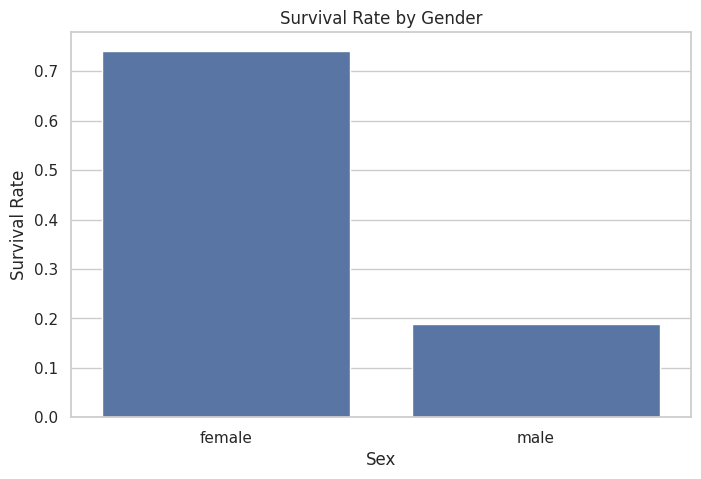

In [16]:
sns.barplot(x=survival_by_sex.index, y=survival_by_sex.values)
plt.title("Survival Rate by Gender")
plt.ylabel("Survival Rate")
plt.show()


In [17]:
survival_by_class = df.groupby('Pclass')['Survived'].mean()
survival_by_class

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


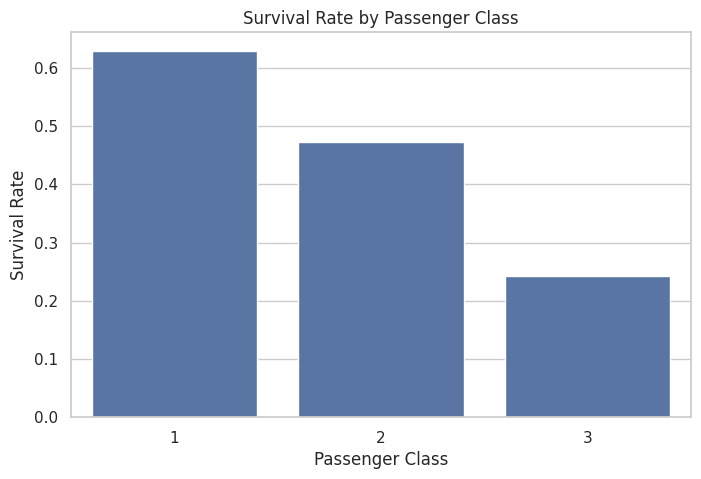

In [18]:
sns.barplot(x=survival_by_class.index, y=survival_by_class.values)
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.show()

In [19]:
# Create age buckets
df['AgeGroup'] = pd.cut(
    df['Age'],
    bins=[0, 12, 18, 35, 60, 80],
    labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']
)

survival_by_age = df.groupby('AgeGroup')['Survived'].mean()
survival_by_age

/tmp/ipython-input-2932194426.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_age = df.groupby('AgeGroup')['Survived'].mean()


,Survived
AgeGroup,
Child,0.579710
Teen,0.428571
Young Adult,0.353271
Adult,0.400000
Senior,0.227273


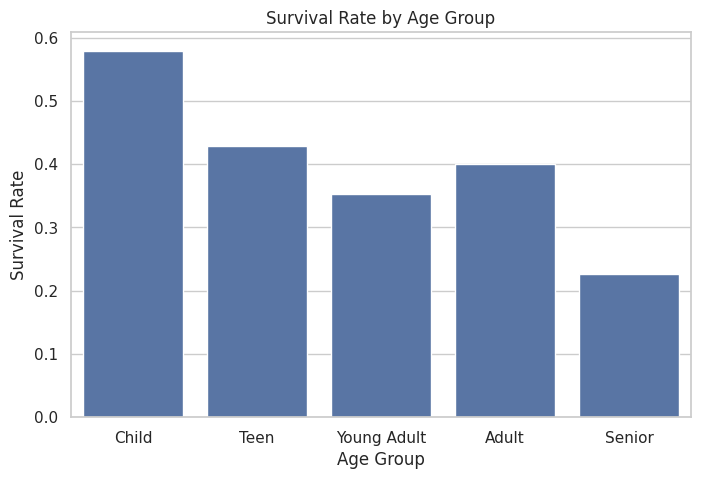

In [20]:
sns.barplot(x=survival_by_age.index, y=survival_by_age.values)
plt.title("Survival Rate by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Survival Rate")
plt.show()

/tmp/ipython-input-1598422915.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_by_embark.index, y=survival_by_embark.values, palette="coolwarm")


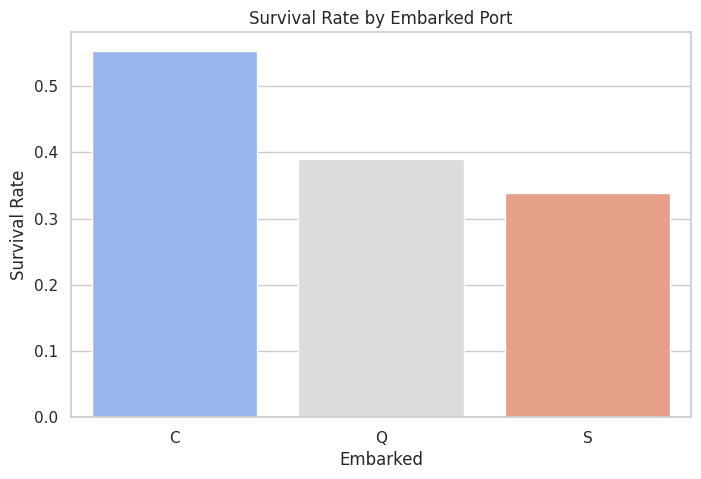

In [28]:
survival_by_embark = df.groupby("Embarked")["Survived"].mean()

sns.barplot(x=survival_by_embark.index, y=survival_by_embark.values, palette="coolwarm")
plt.title("Survival Rate by Embarked Port")
plt.xlabel("Embarked")
plt.ylabel("Survival Rate")
plt.show()

# Box Plots
Age Distribution by Survival

/tmp/ipython-input-1108578110.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Survived", y="Age", data=df, palette="Set2")


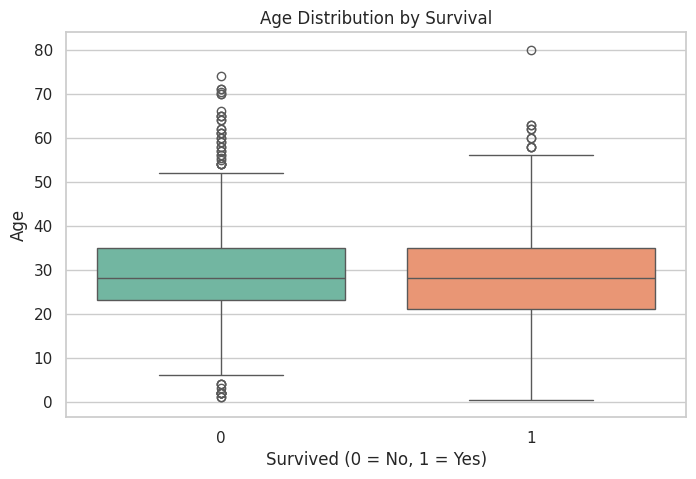

In [21]:
sns.boxplot(x="Survived", y="Age", data=df, palette="Set2")
plt.title("Age Distribution by Survival")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.show()

Fare Distribution by Survival

/tmp/ipython-input-3196319445.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Survived", y="Fare", data=df, palette="Set3")


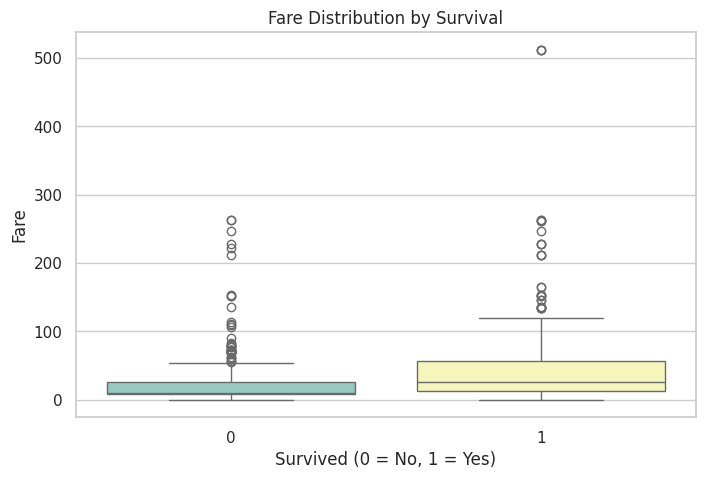

In [22]:
sns.boxplot(x="Survived", y="Fare", data=df, palette="Set3")
plt.title("Fare Distribution by Survival")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Fare")
plt.show()

#Short Insight Report

In [26]:
insights = [
"Female passengers had a much higher survival rate than males, indicating priority was given to women during evacuation.",
"Survival chances decreased with passenger class, where 1st class passengers survived more than those in 2nd and 3rd class.",
"Younger passengers were more likely to survive, as seen from the lower median age of survivors.",
"Passengers who paid higher fares had better survival rates, showing a strong link between wealth, class, and survival probability.",
"Survival rates varied by embarkation port, suggesting differences in passenger composition and class distribution."
]

for i, insight in enumerate(insights, 1):
    print(f"{i}. {insight}")


1. Female passengers had a much higher survival rate than males, indicating priority was given to women during evacuation.
2. Survival chances decreased with passenger class, where 1st class passengers survived more than those in 2nd and 3rd class.
3. Younger passengers were more likely to survive, as seen from the lower median age of survivors.
4. Passengers who paid higher fares had better survival rates, showing a strong link between wealth, class, and survival probability.
5. Survival rates varied by embarkation port, suggesting differences in passenger composition and class distribution.
